<a href="https://colab.research.google.com/github/ChintPatel/CMPE255-Clustering-Assignment/blob/main/G_LLM_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Cluster 0:
 - The quick brown fox jumps over the lazy dog.
 - The brown fox is quick and the blue dog is lazy.
 - The dog is lazy but the brown fox is quick.
Cluster 1:
 - The sky is blue and beautiful.
 - Love this blue and bright sky!
 - The sky is very blue and the sky is very beautiful today.
Cluster 2:
 - A king's breakfast has sausages, ham, bacon, and eggs.
 - I love green eggs, ham, sausages, and bacon!


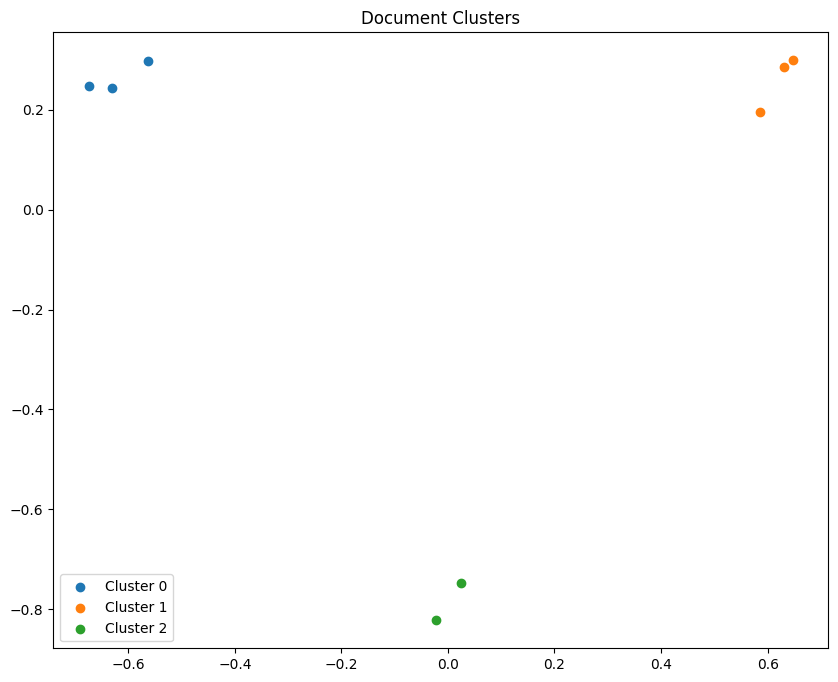

In [ ]:
# Install necessary libraries
!pip install sentence-transformers sklearn matplotlib

# Import necessary libraries
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Define a sample list of documents
documents = [
    "The sky is blue and beautiful.",
    "Love this blue and bright sky!",
    "The quick brown fox jumps over the lazy dog.",
    "A king's breakfast has sausages, ham, bacon, and eggs.",
    "I love green eggs, ham, sausages, and bacon!",
    "The brown fox is quick and the blue dog is lazy.",
    "The sky is very blue and the sky is very beautiful today.",
    "The dog is lazy but the brown fox is quick."
]

# Load a pre-trained Sentence Transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Convert documents to embeddings
embeddings = model.encode(documents)

# Perform KMeans clustering
num_clusters = 3  # Specify the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(embeddings)

# Group documents by cluster
clustered_documents = {i: [] for i in range(num_clusters)}
for i, cluster in enumerate(clusters):
    clustered_documents[cluster].append(documents[i])

# Print clustered documents
for cluster, docs in clustered_documents.items():
    print(f"Cluster {cluster}:")
    for doc in docs:
        print(f" - {doc}")

# Visualize clusters
# Reduce embeddings to 2D using PCA for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Plot the clusters
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    points = reduced_embeddings[clusters == i]
    plt.scatter(points[:, 0], points[:, 1], label=f"Cluster {i}")

plt.title("Document Clusters")
plt.legend()
plt.show()
